# Seaborn
- seaborn is a python data visualisation libary.
- it is built on top of matplotlib.

In [1]:
!pip install seaborn

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = sns.load_dataset('iris')

# To load iris file

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


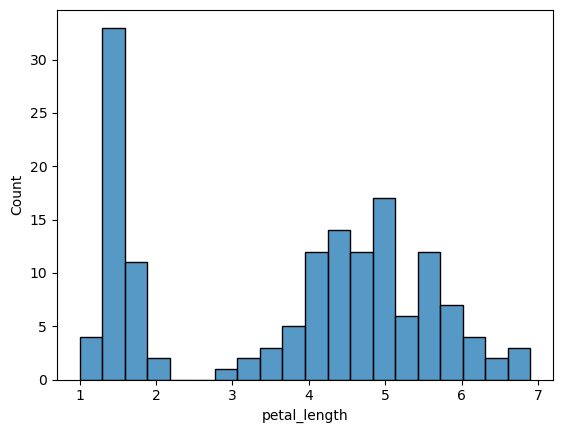

In [5]:
#  plot the distribution of the data ---> like a histogram
sns.histplot(iris['petal_length'], bins= 20)
plt.show()

# histplot is used to plot histogram.
# Bins are the intervals into which the data is divided, and the height of each bin represents the number of observations in that interval.
# Histogram mein pahle vaala plot setosa ka hai coz iski petal_length kam hai then baad vaale plot mein versicolor and virginica ka overlap dikhaya gaya hai.

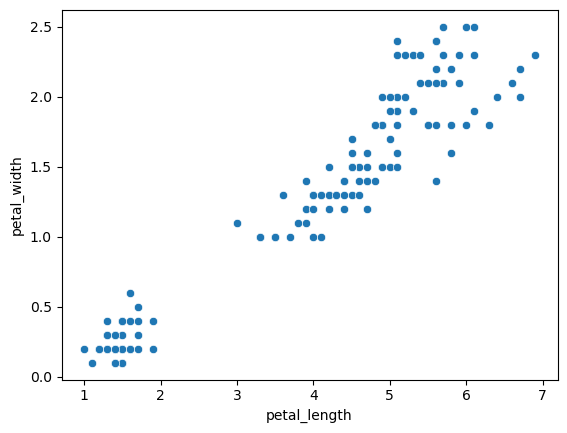

In [6]:
sns.scatterplot(x= iris['petal_length'], y = iris['petal_width'])
plt.show()

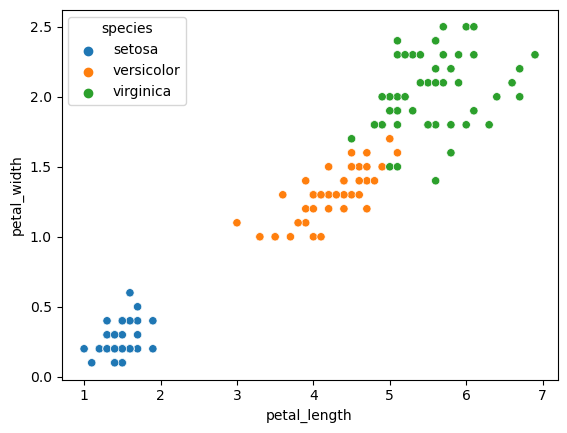

In [7]:
sns.scatterplot(x ='petal_length', y ='petal_width' , data=iris, hue ='species')
plt.show()

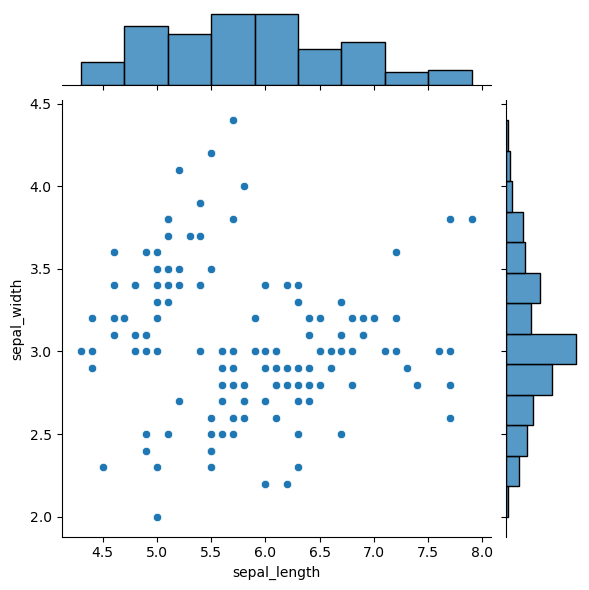

In [8]:
sns.jointplot(x= 'sepal_length', y = 'sepal_width', data= iris)
plt.show()

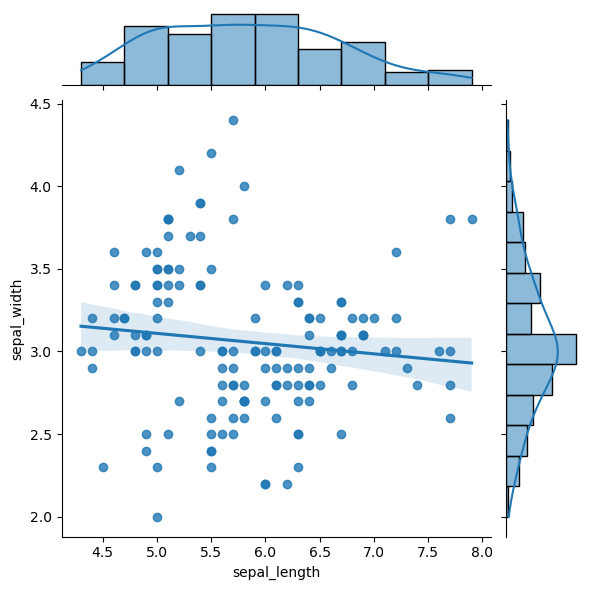

In [9]:
sns.jointplot(x= 'sepal_length', y = 'sepal_width', data= iris, kind='reg')
plt.show()

# kind='reg': Specifies that the plot should include a regression line. The kind parameter determines the type of plot to draw. 
# When kind='reg', Seaborn includes a scatter plot with a fitted regression line and confidence interval.

### Pair Plot

C:\Users\clash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


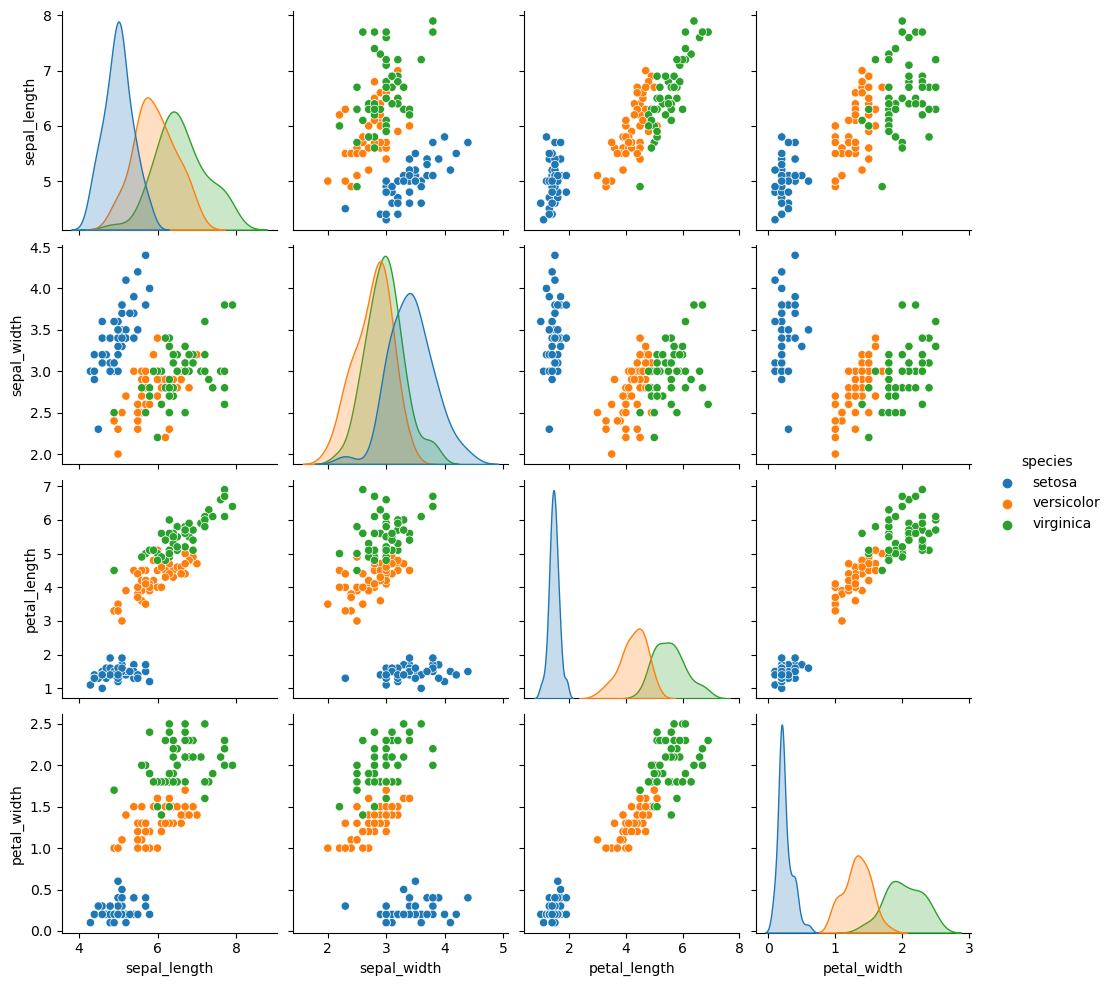

In [10]:
sns.pairplot(data = iris, hue= 'species')

## Categorical Plots

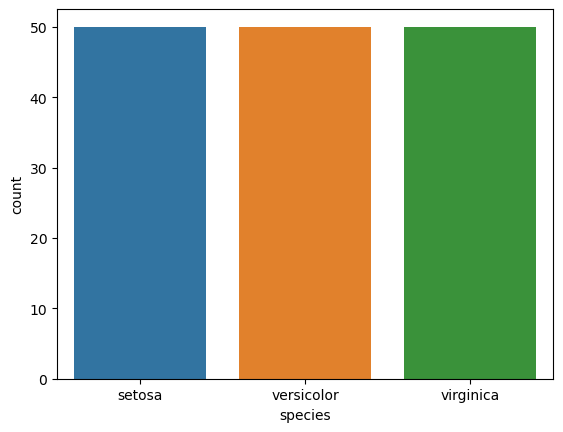

In [11]:
sns.countplot(x = 'species', data = iris)
plt.show()

# The sns.countplot function in Seaborn is used to create a bar plot that shows the count of observations in each categorical bin using bars. 

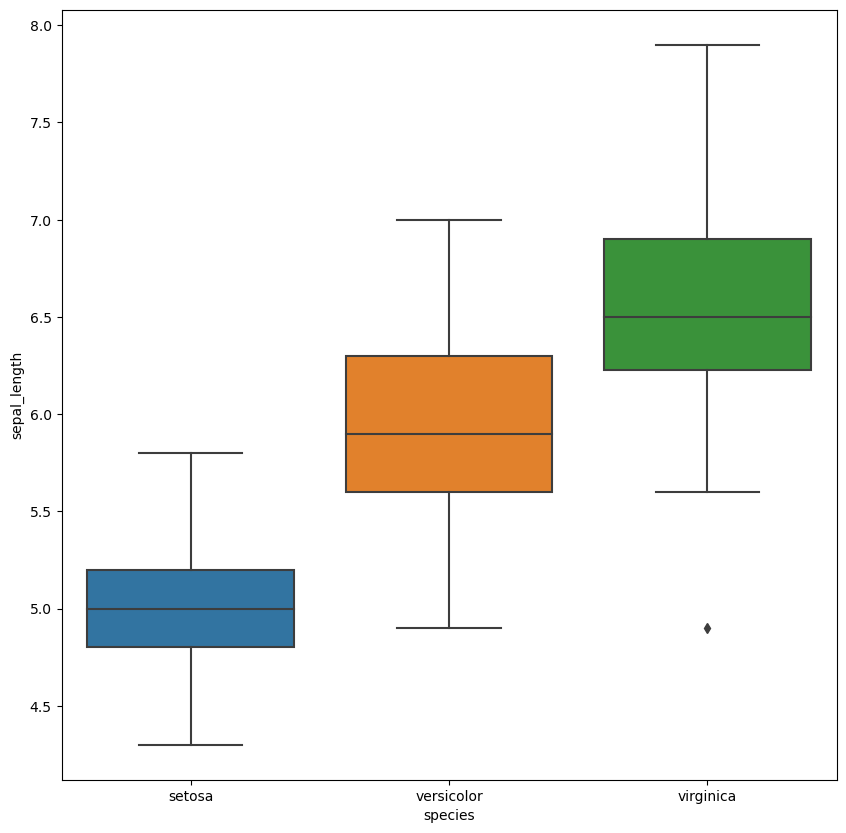

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'species', y = 'sepal_length', data = iris)
plt.show()

# Bottom lines shows the min value and top lines shows the max value. Middle line shows the meadian value. 
# From bottom line(1st line) to 2nd line, it shows the 25% values between it. Between 2nd and 4th line(i.e., the color part) show the 50% of the values. 4th line to the top line(5th) shows the remaining 25% data.
# From bottom line(1st line) to 4th line(2nd from top), this region shows the 75% of the data.
# Diamond below Virginica means it is the outlier i.e., most of flowers lies in that range but this flower has different sepal_length from others.

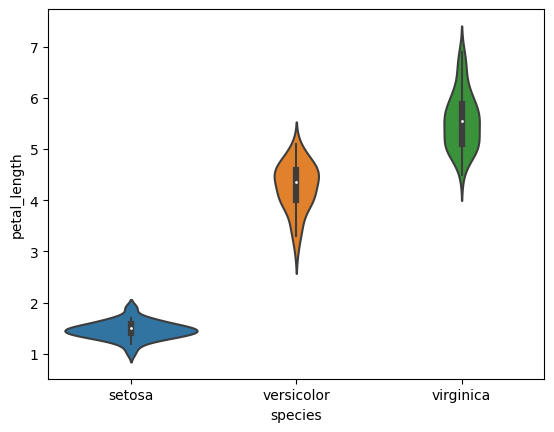

In [13]:
sns.violinplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

# The violin plot, which is a combination of a box plot and a kernel density plot. It provides a deeper understanding of the distribution of the data.

### Finding correlation

In [14]:
iris_numeric = iris.select_dtypes(include=['float64', 'int64'])
iris_numeric.corr()

# First Line -> Selects only numeric columns from the DataFrame, excluding the species column which is non-numeric.
# The corr() function in Pandas calculates the pairwise correlation coefficients(how x and y are related) between columns of a DataFrame. 
# Correlation coefficients are statistical measures that describe the strength and direction of the linear relationship between two variables. 
# The result is a correlation matrix, which is a table showing the correlation coefficients between all possible pairs of variables in the DataFrame.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: xlabel='sepal_length', ylabel='sepal_length'>

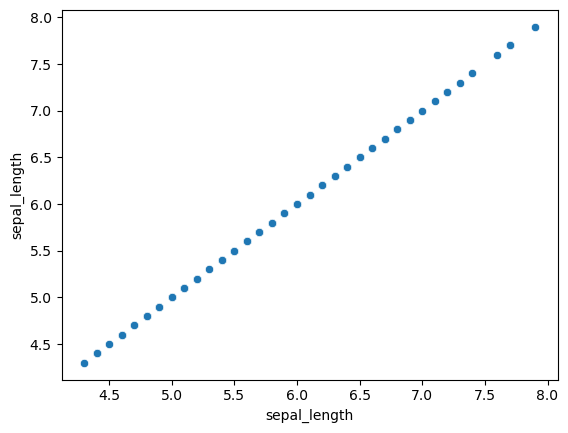

In [15]:
sns.scatterplot(x= 'sepal_length', y= 'sepal_length', data = iris)

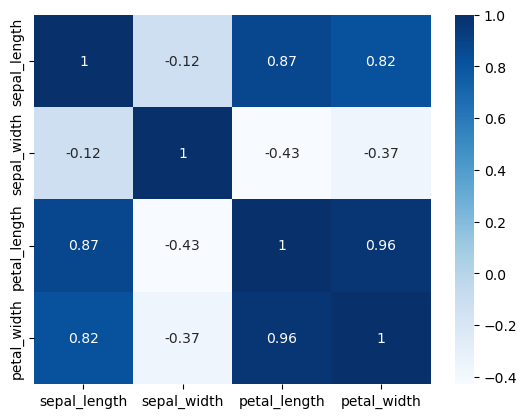

In [16]:
sns.heatmap(iris_numeric.corr(), cmap= "Blues", annot=True)
plt.show()

# cmap="Blues": Specifies the colormap to use for the heatmap. In this case, "Blues" is used, which will color the heatmap in shades of blue. Dark means better corelation.
# annot=True: Annotates each cell in the heatmap with the correlation coefficient value. 

## Visualise Tips Dataset

In [17]:
tips = sns.load_dataset('tips')

In [18]:
tips.shape

(244, 7)

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


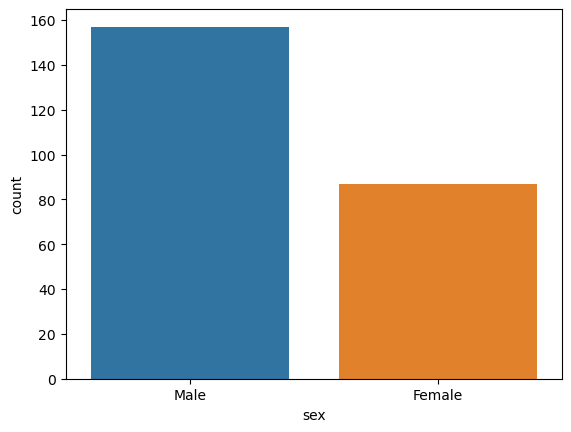

In [20]:
sns.countplot(x = tips['sex'])
plt.show()

# Basically a Count plot showing the count of each category ('Male' and 'Female') in the 'sex' column of the 'tips' dataset.

In [21]:
tips['day'].unique()

# Different days in day column.

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

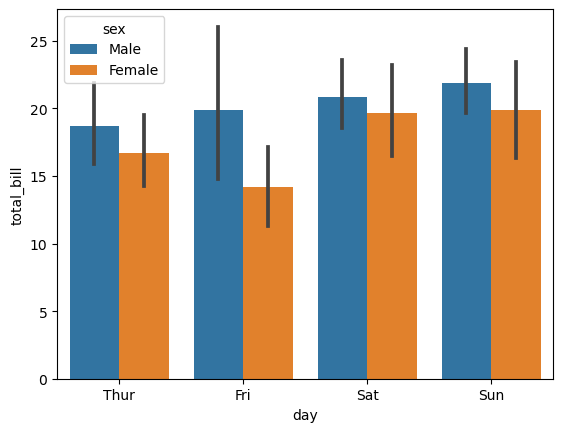

In [22]:
# out of all the days which day gets the highest amount
# Ans - Sunday

sns.barplot(x = 'day', y = 'total_bill', data=tips, estimator=np.mean, hue = 'sex')
plt.show()

# estimator is by-default gives mean of data. The estimator=np.mean argument specifies that the mean should be used to aggregate the data.

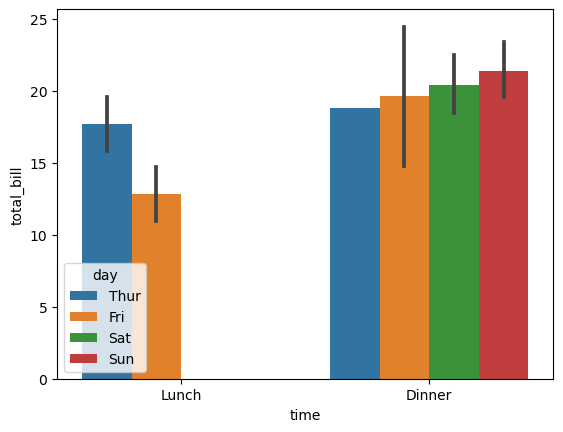

In [23]:
# what do people prefer - lunch or dinner ?
sns.barplot(x = 'time', y = 'total_bill', data = tips, hue = 'day')
plt.show()

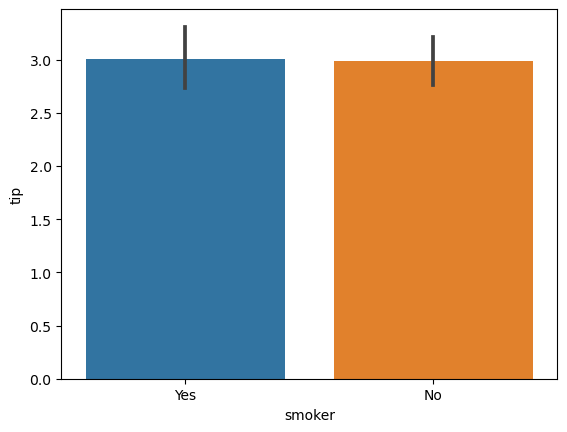

In [24]:
# do smoker people give more tip?
sns.barplot(x = 'smoker', y = 'tip', data = tips)
plt.show()